In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


model.train(
    data="../pothole.yaml",
    epochs=30,
    imgsz=512,
    batch=32,
    device="mps",
    workers=8,
    freeze=10,      # freeze first 10 layers (backbone)
    augment=False
)


Ultralytics 8.3.245 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../pothole.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

KeyboardInterrupt: 

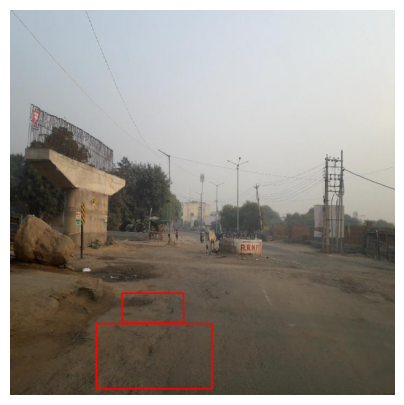

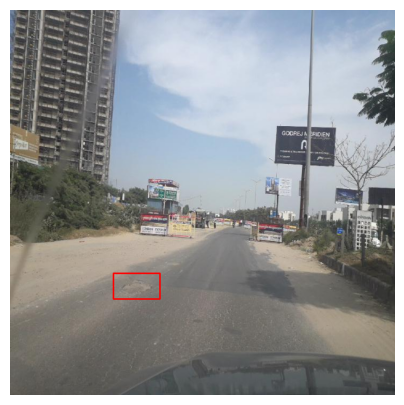

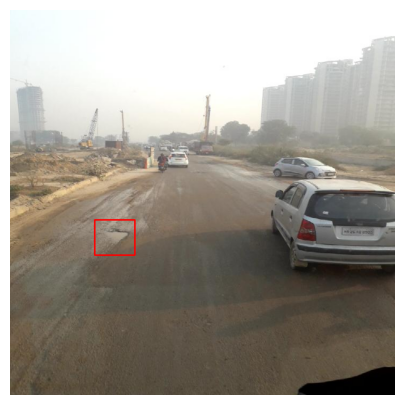

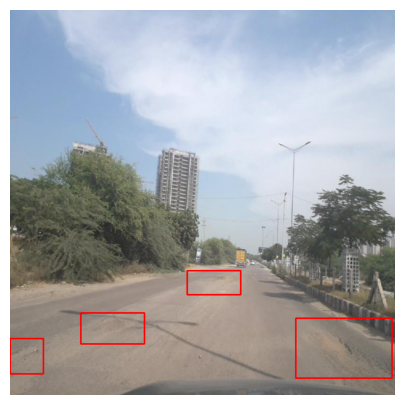

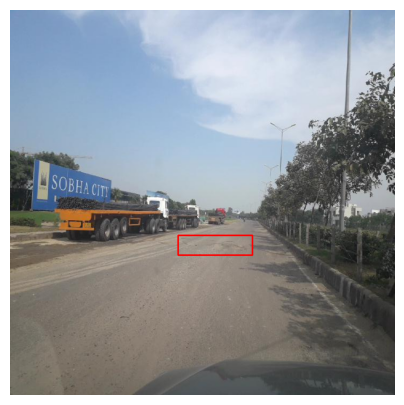

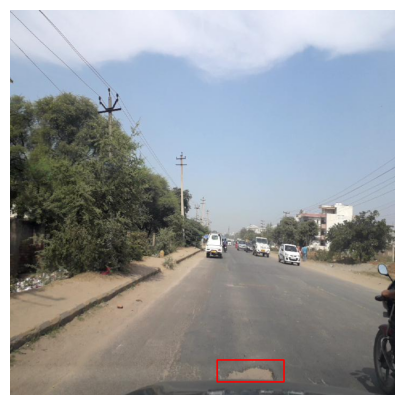

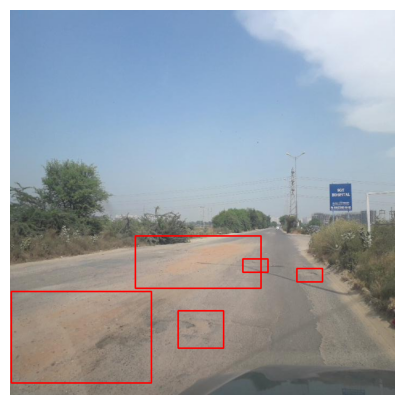

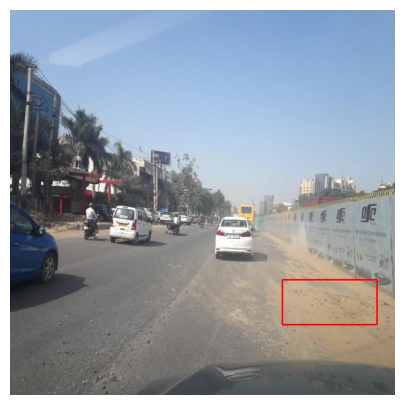

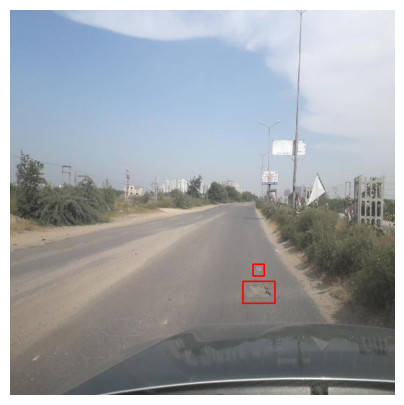

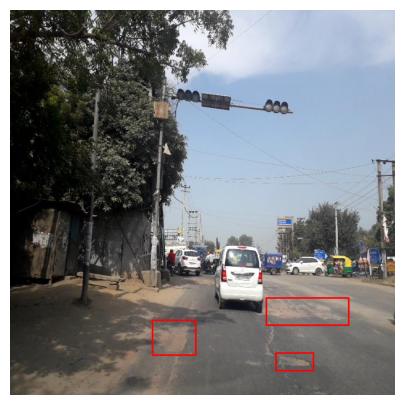

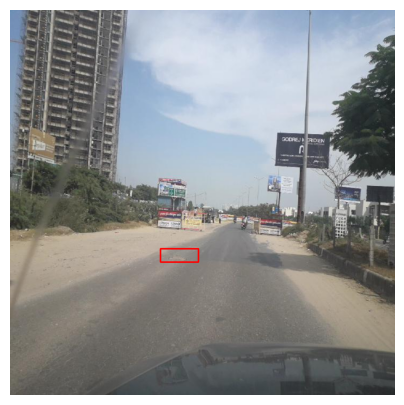

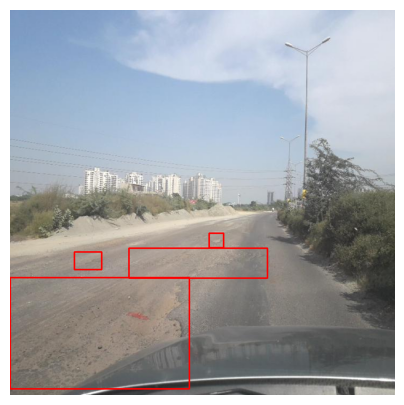

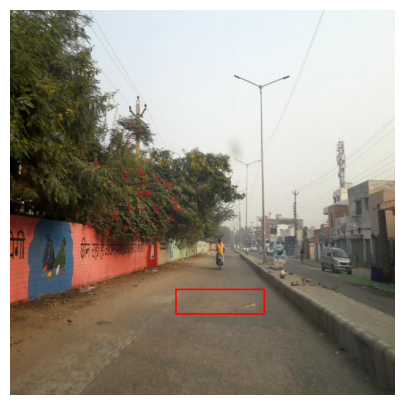

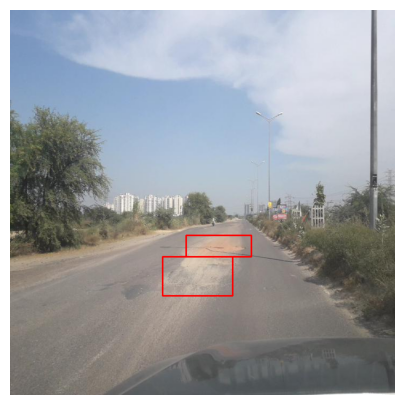

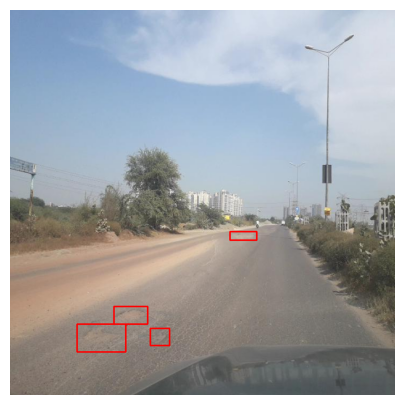

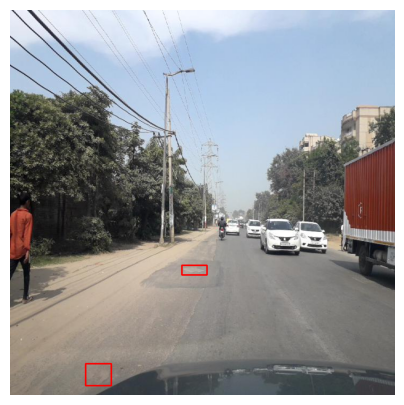

In [6]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path("../data/RDD2020")
IMG_DIR = BASE / "images/train"
LBL_DIR = BASE / "labels/train"

label_files = list(LBL_DIR.glob("*.txt"))[:20]

for label_file in label_files:
    # locate image (any extension)
    imgs = list(IMG_DIR.glob(label_file.stem + ".*"))
    if not imgs:
        continue

    img = cv2.imread(str(imgs[0]))
    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_file) as f:
        for line in f:
            _, xc, yc, bw, bh = map(float, line.split())
            x1 = int((xc - bw / 2) * w)
            y1 = int((yc - bh / 2) * h)
            x2 = int((xc + bw / 2) * w)
            y2 = int((yc + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
